In [7]:
%load_ext autoreload
%autoreload 2

# Importing necessary libaries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sys
sys.path.insert(0, '../')
import src.model as model
import src.cleanup as cleanup
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Reading csv for cluster
churners = pd.read_csv('../data/churn_encoded.csv')
# Drop CLIENTNUM column as it's a unique descriptor per data point and not useful for analysis
churners = cleanup.drop_column(churners, 'CLIENTNUM')
churners.head()

,Attrited,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0,45,3,2.0,3.0,0.0,39,5,1,3,...,11914.0,1.335,1144,42,1.625,0.061,1,0,1,0
1,0,49,5,4.0,1.0,0.0,44,6,1,2,...,7392.0,1.541,1291,33,3.714,0.105,0,0,0,1
2,0,51,3,4.0,4.0,0.0,36,4,1,0,...,3418.0,2.594,1887,20,2.333,0.000,1,0,1,0
3,0,40,4,2.0,1.0,0.0,34,3,4,1,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,0
4,0,40,3,1.0,3.0,0.0,21,5,1,0,...,4716.0,2.175,816,28,2.500,0.000,1,0,1,0


In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = model.split_data(churners, 'Attrited', 0.2)



In [10]:
# Scale the data around the mean using StandardScaler

X_train = model.scale_data(X_train)
X_test = model.scale_data(X_test)
y_train = model.scale_data(y_train)
y_test = model.scale_data(y_test)
# Check the data is scaled and the dimensions are correct
display(X_train.head())
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.460264,-0.269301,-1.523858,0.618024,-0.252324,0.010590,1.407770,-1.327918,-1.315007,-0.785347,...,-0.774686,0.365060,-0.175988,0.868681,0.731538,1.595271,1.060197,3.535770,-0.935074,-0.790617
1,-0.038925,1.268667,-0.936766,1.296151,5.777409,0.639522,1.407770,0.665682,-0.412909,2.831926,...,2.838044,-0.766427,-0.712329,-0.755311,0.114521,-0.881577,1.060197,-0.282824,-0.935074,1.264835
2,0.086008,1.268667,0.237417,0.618024,-0.252324,0.639522,0.761851,-0.331118,0.489189,0.759437,...,0.886857,-0.584662,0.108413,0.441315,0.302127,-0.997284,1.060197,-0.282824,-0.935074,1.264835
3,0.086008,-0.269301,0.237417,-0.738230,-0.252324,0.010590,1.407770,-0.331118,0.489189,-0.327848,...,-0.475843,-0.343823,-0.656640,-1.139940,-1.861600,0.608148,-0.943221,-0.282824,1.069434,-0.790617
4,1.835061,-0.269301,0.824508,1.974279,-0.252324,1.645814,-0.529987,-2.324718,1.391287,0.297228,...,0.149111,1.160282,-0.980649,-1.652780,1.890529,-0.198184,1.060197,-0.282824,1.069434,-0.790617


(8101, 21)

(2026, 21)

(8101, 1)

(2026, 1)

c:\Users\gholl\Repositories\churn-bros-clustered-and-classified\churn\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gholl\Repositories\churn-bros-clustered-and-classified\churn\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gholl\Repositories\churn-bros-clustered-and-classified\churn\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gholl\Repositories\churn-bros-c

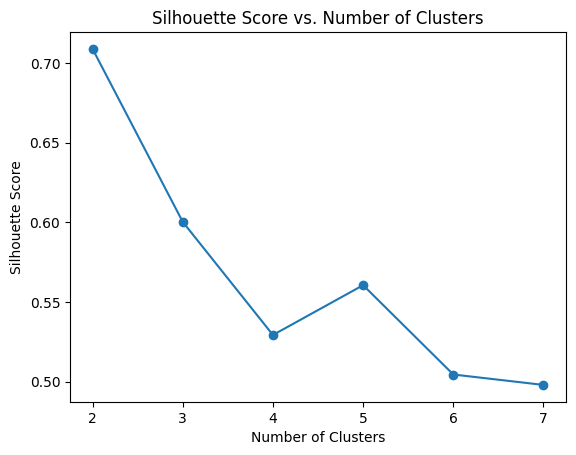

In [11]:
# Silhouette scores are calculated to estimate the optimum number of clusters for the data. In this case, five.

k_values = range(2, 8)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(churners)
    silhouette_avg = silhouette_score(churners, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')  
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [12]:
churners_clustered = model.clustering(churners, 6)
display(churners_clustered)
churners_clustered.shape

c:\Users\gholl\Repositories\churn-bros-clustered-and-classified\churn\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 1, 2, ..., 5, 1, 5])

(10127,)

In [28]:
# Consider PCA
# Below is an attempt at combining into two features using PCA
n_of_components = 2
pca = PCA(n_components=n_of_components)
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA

    

array([[-0.89256942,  0.1144133 ],
       [ 5.45773702, -0.77744993],
       [ 1.96026456, -0.19622988],
       ...,
       [-2.13254658,  0.5707018 ],
       [ 0.50431311,  1.13166762],
       [ 0.90986093, -0.64531204]])